# Predicting Credit Card Approvals

## Exploratory Data Analysis (EDA)

In [10]:
# Import pandas
import pandas as pd

# Load dataset
df = pd.read_csv("creditcard.csv", header=None)

In [12]:
# Inspect data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [13]:
# Summary of Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [14]:
# Statistical details of dataframe
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [19]:
# checking if there exists any missing values
df.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

In [21]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

array([[<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'14'}>]], dtype=object)

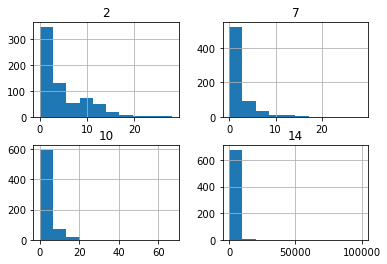

In [23]:
# Histogram for available data of columns 2,7,10,14
df.hist()

# Data Preprocessing

In [24]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Dropping the unnecessary features 
df1 = df.drop([11,13],axis=1)

In [25]:
# peforming train test split
df1_train, df1_test = train_test_split(df1, test_size=0.3, random_state=1)

In [26]:
# There are missing values in the dataframe in the form '?'. 
# This is handled in the following steps.

In [27]:
# Replacing the '?'s with NaN
df1_train = df1_train.replace('?',np.nan)
df1_test = df1_test.replace('?',np.nan)

In [31]:
# checking for null values/missing values in dataframe
df1_train.isnull().sum()

0     6
1     6
2     0
3     5
4     5
5     6
6     6
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64

In [32]:
# Filling the missing values in the dataframe with mean imputation
df1_train.fillna(df1_train.mean(), inplace=True)
df1_test.fillna(df1_train.mean(), inplace=True)

/var/folders/q9/vmdwqts13cj9tk5_rqd7w6pr0000gn/T/ipykernel_57115/2568501163.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1_train.fillna(df1_train.mean(), inplace=True)
/var/folders/q9/vmdwqts13cj9tk5_rqd7w6pr0000gn/T/ipykernel_57115/2568501163.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1_test.fillna(df1_train.mean(), inplace=True)


In [33]:
# Number of missing values in train and test sets
print(df1_train.isnull().sum())
print(df1_test.isnull().sum())

0     6
1     6
2     0
3     5
4     5
5     6
6     6
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     6
1     6
2     0
3     1
4     1
5     3
6     3
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


In [34]:
# Iterate over each column of dataframe
for col in df1_train.columns:
    # Checking if the column is of object type
    if df1_train[col].dtypes == 'object':
        # Impute with the most frequent value
        df1_train = df1_train.fillna(df1_train[col].value_counts().index[0])
        df1_test = df1_test.fillna(df1_train[col].value_counts().index[0])

# Counting the number of NaNs in the dataset after imputation
print(df1_train.isnull().sum())
print(df1_test.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


In [35]:
# Converting the categorical features
df1_train = pd.get_dummies(df1_train)
df1_test = pd.get_dummies(df1_test)

# Reindexing the columns of the test set
df1_test = df1_test.reindex(columns=df1_train.columns, fill_value=0)

In [36]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregating features and labels into separate variables
X_train, y_train = df1_train.iloc[:, :-1].values, df1_train.iloc[:, [-1]].values
X_test, y_test = df1_test.iloc[:, :-1].values, df1_test.iloc[:, [-1]].values

# MinMaxScaler and using it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

### Model Fitting

In [37]:
# Import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# LogisticRegression classifier with default values
logreg = LogisticRegression()

# Fitting logreg to the train set
logreg.fit(rescaledX_train,y_train)

y_pred = logreg.predict(X_test)

accuracy_score(y_test,y_pred)

/Users/bdvvgangarajuabbireddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7971014492753623

After scaling using Minmaxscaler, and fitting logistic regression resulted an acurracy of 79.71

## Evaluating Performance of Model

In [38]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  1.0


array([[ 85,   0],
       [  0, 122]])

Performing GridSearchCV for better performance and accuracy!!!

In [43]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100]

param_grid = dict(tol=tol, max_iter=max_iter)

#### Best Performing Model

In [46]:
# GridSearchCV
model1 = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fitting grid_model to the data
model1_result = grid_model.fit(rescaledX_train, y_train)

# Summarizing results
best_score, best_params = model1_result.best_score_, model1_result.best_params_

# Performing best model on the test set
best_model = model1_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test,y_test))

Accuracy of logistic regression classifier:  1.0


/Users/bdvvgangarajuabbireddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bdvvgangarajuabbireddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bdvvgangarajuabbireddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bdvvgangarajuabbireddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversio

The model performed extremely well with an accuracy score of 1.0 making our model the best fit for predicting credit card approvals